<a href="https://colab.research.google.com/github/j1c4b/ColabStocks/blob/SP500_Model_v1/SP500_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [6]:
#load the dataset
data_sp500 = pd.read_csv('spy500_20130906_20230906.csv')
#show data
data_sp500

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-09-06,1657.439941,1664.829956,1640.619995,1655.170044,1655.170044,3123880000
1,2013-09-09,1656.849976,1672.400024,1656.849976,1671.709961,1671.709961,3102780000
2,2013-09-10,1675.109985,1684.089966,1675.109985,1683.989990,1683.989990,3691800000
3,2013-09-11,1681.040039,1689.130005,1678.699951,1689.130005,1689.130005,3135460000
4,2013-09-12,1689.209961,1689.969971,1681.959961,1683.420044,1683.420044,3106290000
...,...,...,...,...,...,...,...
2511,2023-08-29,4432.750000,4500.140137,4431.680176,4497.629883,4497.629883,3354820000
2512,2023-08-30,4500.339844,4521.649902,4493.589844,4514.870117,4514.870117,3064110000
2513,2023-08-31,4517.009766,4532.259766,4507.390137,4507.660156,4507.660156,3946360000
2514,2023-09-01,4530.600098,4541.250000,4501.350098,4515.770020,4515.770020,3246260000


<Axes: >

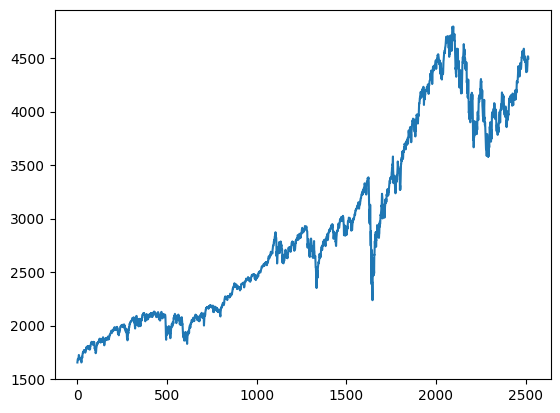

In [5]:
#show data
data_sp500["Close"].plot()

In [7]:
#split data into training and testing data sets
train_data = data_sp500.iloc[:int(.99*len(data_sp500)), :]
test_data = data_sp500.iloc[int(.99*len(data_sp500)):, :]

In [8]:
#define the features and target variable
features = ['Open','Volume']
target = 'Close'

In [10]:
#create and train model
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [11]:
#make and show predictions on test data
predictions = model.predict(test_data[features])
print('Model Predictions')
print(predictions)

Model Predictions
[4563.0005 4587.956  4555.8286 4470.337  4518.1978 4478.765  4531.725
 4536.117  4474.0557 4446.8936 4455.049  4472.138  4421.176  4406.4624
 4356.967  4369.623  4421.23   4400.215  4443.6235 4407.2812 4452.1533
 4467.7515 4527.21   4526.071  4536.5396 4510.247 ]


In [12]:
#show actual values
print('Actual values')
print(test_data[target])

Actual values
2490    4588.959961
2491    4576.729980
2492    4513.390137
2493    4501.890137
2494    4478.029785
2495    4518.439941
2496    4499.379883
2497    4467.709961
2498    4468.830078
2499    4464.049805
2500    4489.720215
2501    4437.859863
2502    4404.330078
2503    4370.359863
2504    4369.709961
2505    4399.770020
2506    4387.549805
2507    4436.009766
2508    4376.310059
2509    4405.709961
2510    4433.310059
2511    4497.629883
2512    4514.870117
2513    4507.660156
2514    4515.770020
2515    4496.830078
Name: Close, dtype: float64


In [13]:
#show the model acuracy
accuracy = model.score(test_data[features], test_data[target])
print('Accuracy')
print(accuracy)

Accuracy
0.7022945378441866


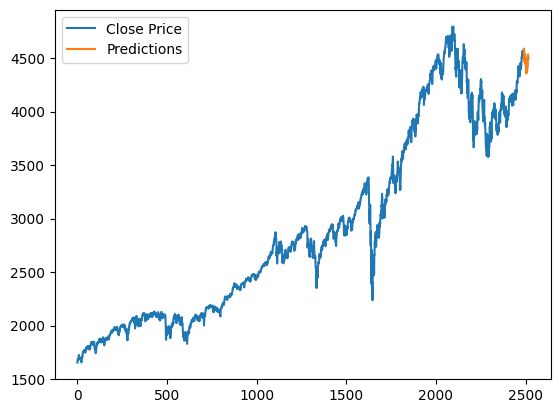

In [17]:
#plot predictions and close price
plt.plot(data_sp500['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()

# New Section